# Numerical Computing: Homework 3

* Polynomials in `numpy`
https://numpy.org/doc/stable/reference/routines.polynomials-package.html#module-numpy.polynomial

* Interpolation (https://docs.scipy.org/doc/scipy/tutorial/interpolate.html)
    * Polynomial interpolation
    * B-splines 

* Function approximation
    * Polynomial approximation 
    * Smoothing splines


##### Authors:

* alberto.suarez@uam.es
* Student 1: David Álvarez Saez
* Student 2: Andrés Teruel Fernández


#### Instructions

* The code should follow 
    * PEP 20 – The Zen of Python. https://peps.python.org/pep-0020    
    * PEP 8 – Style Guide for Python Code. <https://peps.python.org/pep-0008>
    * PEP 257 – Docstring Conventions. https://peps.python.org/pep-0257
    * Type hints. https://docs.python.org/3/library/typing.html
    * Mypy. https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html
    * Google Python sytle guide. https://google.github.io/styleguide/pyguide.html  

* Please use Markdown [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet] cells with formulas in latex for the derivations. Alternatively, insert a scanned image of the derivations, as it is here done with the Alan Turing [https://www.turing.org.uk/] picture.


![alt text](alan-turing.jpg "Alan Turing")

In [79]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import BSpline, splrep
from numpy.polynomial import Polynomial, Chebyshev, Legendre
from numerical_computing_HW_003_curve_fitting_2024_10_02 import ChebyshevApproximation

### Polynomials in numpy

In [2]:
polynomial_coefficients = (0.5, 2.3, -1.7, 0.0, 4.8)
polynomial = Polynomial(polynomial_coefficients)
print(polynomial)

factorial = 1.0
for i in range(polynomial.degree() + 2):
    print(
        'coefficient[{:d}] = {:3.1f}'.format(
            i, 
            polynomial.deriv(i)(0.0) / factorial
        )
    )
    factorial *= (i + 1) 


0.5 + 2.3·x - 1.7·x² + 0.0·x³ + 4.8·x⁴
coefficient[0] = 0.5
coefficient[1] = 2.3
coefficient[2] = -1.7
coefficient[3] = 0.0
coefficient[4] = 4.8
coefficient[5] = 0.0


### Function approximation

    

In [3]:
# Common parameters
a, b = 0.0, 5.0
f = np.sin

In [4]:
# Linear fit
degree = 3 # Degree of the approximation
x = np.linspace(a, b, num=degree+1)
y = f(x)

polynomial_fit = Polynomial.fit(x, y, degree) 
print(
    'Polynomial fit of degree {:d}: \n\t'.format(degree)
    , polynomial_fit
)
x_pred, y_pred_polynomial = polynomial_fit.linspace(1000, (a, b))
y_true = f(x_pred)
error_pred_polynomial = y_pred_polynomial - y_true

Polynomial fit of degree 3: 
	 0.51265526 - 1.9414016·x - 0.9921174·x² + 1.46193946·x³


In [5]:
# Chebyshev approximation
chebyshev_approximation = ChebyshevApproximation(a, b, degree, f)
y_pred_chebyshev = chebyshev_approximation.eval(x_pred) # math.sin(0.1) = 0.099833416646828155
error_pred_chebyshev = y_pred_chebyshev - y_true


Minimax property of the Chebyshev approximation
Maximum error of the polynomial approximation: 0.2088
Maximum error of the Chebyshev approximation: 0.1386


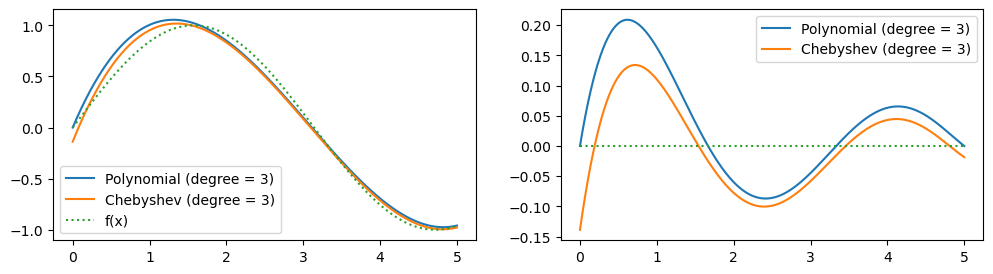

In [6]:
# Create the error and 
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(
    x_pred, 
    y_pred_polynomial, 
    label='Polynomial (degree = {:d})'.format(degree)
)
axs[0].plot(
    x_pred, 
    y_pred_chebyshev, 
    label='Chebyshev (degree = {:d})'.format(degree)
)
axs[0].plot(x_pred, y_true, ':', label='f(x)')
axs[0].legend()

axs[1].plot(
    x_pred, 
    y_pred_polynomial - y_true,
    label='Polynomial (degree = {:d})'.format(degree)
)
axs[1].plot(
    x_pred, 
    y_pred_chebyshev - y_true,
    label='Chebyshev (degree = {:d})'.format(degree)
)
axs[1].plot(x_pred, np.zeros_like(x_pred), ':')
axs[1].legend()


print('\nMinimax property of the Chebyshev approximation')

print('Maximum error of the polynomial approximation: {:.4g}'.format(
        np.max(np.abs(error_pred_polynomial))
    )
)
print('Maximum error of the Chebyshev approximation: {:.4g}'.format(
        np.max(np.abs(error_pred_chebyshev))
    )
)

### Polynomial fit

In [80]:
# Generate synthetic data
x = np.linspace(a, b, num=11)                                                                                                  

noise_level = 0.2
rng = np.random.default_rng(seed=8123)
noise_y = noise_level * rng.standard_normal(np.size(x))
y_measured = f(x) + noise_y

Polynomial fit of degree 1: 
	 0.03562344 - 0.8220733·x 

Polynomial fit of degree 3: 
	 0.49638869 - 1.71267964·x - 1.15191315·x² + 1.2508516·x³ 

Polynomial fit of degree 5: 
	 0.46805281 - 1.55485376·x - 0.90594194·x² + 0.59554309·x³ -
0.24597121·x⁴ + 0.51734882·x⁵ 

Polynomial fit of degree 10: 
	 0.49997612 - 2.87979306·x - 3.23800638·x² + 23.09514663·x³ +
20.22057942·x⁴ - 97.30237752·x⁵ - 58.04630818·x⁶ + 150.10282942·x⁷ +
65.30452858·x⁸ - 73.46119837·x⁹ - 25.40758592·x¹⁰ 



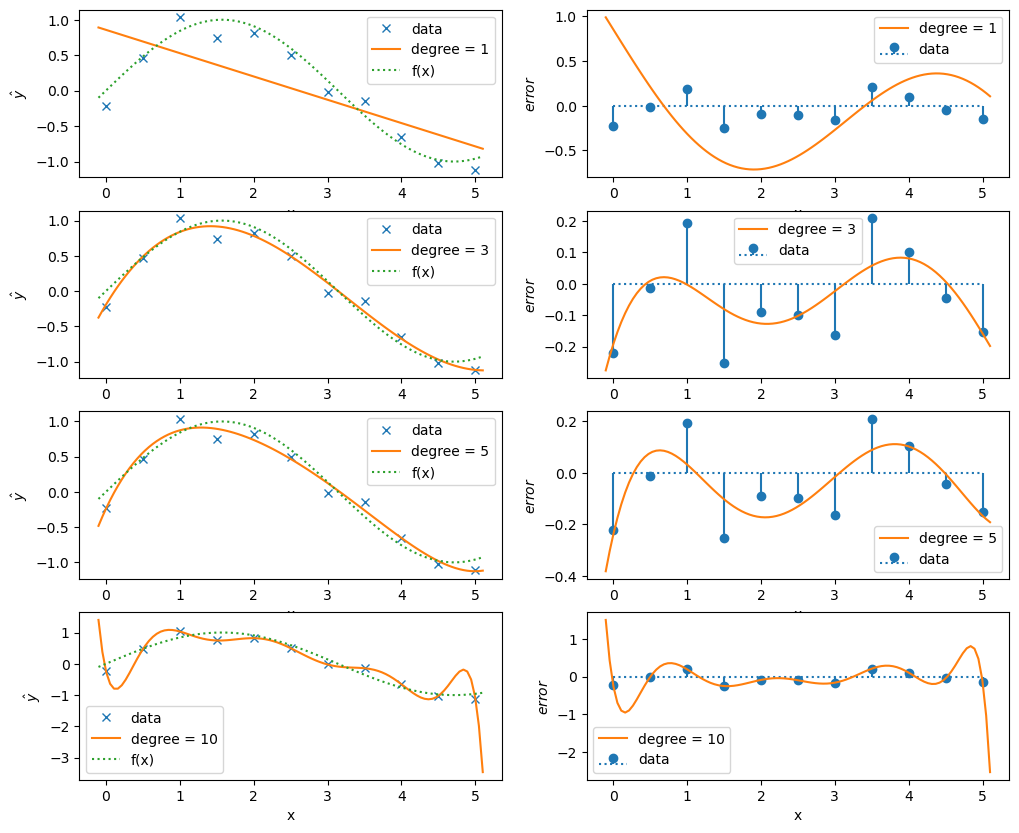

In [8]:
# Setup the fit
degrees = [1, 3, 5, len(y_measured)-1]

x_slack = 0.1
x_domain = (np.min(x) - x_slack, np.max(x) + x_slack)
n_domain = 100
x_pred = np.linspace(*x_domain, n_domain)
y_true = f(x_pred)

fig, ax = plt.subplots(len(degrees), 2, figsize=(12, 10))

for i, degree in enumerate(degrees):
    polynomial_fit = Polynomial.fit(x, y_measured, deg=degree) 
    
    print(
        'Polynomial fit of degree {:d}: \n\t'.format(degree), 
        polynomial_fit, 
        '\n'
    )
    
    x_pred, y_pred = polynomial_fit.linspace(n_domain, x_domain)
    
    ax[i, 0].plot(x, y_measured, 'x', label='data')
    ax[i, 0].plot(x_pred, y_pred, label='degree = {:d}'.format(degree))
    ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
    ax[i, 0].set_xlabel('x')
    ax[i, 0].set_ylabel('$\hat{y}$')
    ax[i, 0].legend()
    
    # ax[i, 1].plot(x, np.zeros_like(x), ':')
    ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
    ax[i, 1].plot(
        x_pred, 
        y_pred - y_true, 
        label='degree = {:d}'.format(degree)
    )
    ax[i, 1].set_xlabel('x')
    ax[i, 1].set_ylabel('$error$')
    ax[i, 1].legend()

---

## Exercises
### 1. B-splines 
    * Splines in 5 minutes: Part 1 -- cubic curves: https://www.youtube.com/watch?v=YMl25iCCRew
    * Splines in 5 minutes: Part 2 -- splines:      https://www.youtube.com/watch?v=DLsqkWV6Cag
    * Splines in 5 minutes: Part 3 -- B-splines:    https://www.youtube.com/watch?v=JwN43QAlF50

#### A. Explain briefly what is a B-spline. Especifically, what is different between a B-spline and a natural cubic spline.
    Las B-splines sirven para interpolar valores dados una serie de puntos de control. Son funciones por partes que concatenan diferentes curvas Bézier para establecer una curva cont'inua, con continuidad en su primera y segunda derivada.

    Se diferencian de las splines c'ubicas naturales porque la curva resultante no 'pasa' por los puntos de control iniciales, pero como ventaja, tiene control local.
    TODO: https://web.mit.edu/hyperbook/Patrikalakis-Maekawa-Cho/node17.html

#### B. Use B-splines of different orders to fit the data with different noise levels. Comment the results, especially regarding robustness to noise:

In [81]:
# Common parameters
f = np.sin

In [99]:
b_spline_degrees=[1,2,3,4,5] # degree of the b-spline (1<=k<=5)

# Noise parametres
noise_levels = [0.01, 0.1, 0.6, 1, 2]
rng = np.random.default_rng(seed=4515)

# Generate synthetic data
a, b = -5.0, 5.0
num_control_points = 16
x_slack = 0.1
n_domain = 100

x = np.linspace(a, b, num=num_control_points)
x_domain = (np.min(x) - x_slack, np.max(x) + x_slack)
x_pred = np.linspace(*x_domain, n_domain)

# Perfect data
y_true = f(x_pred)

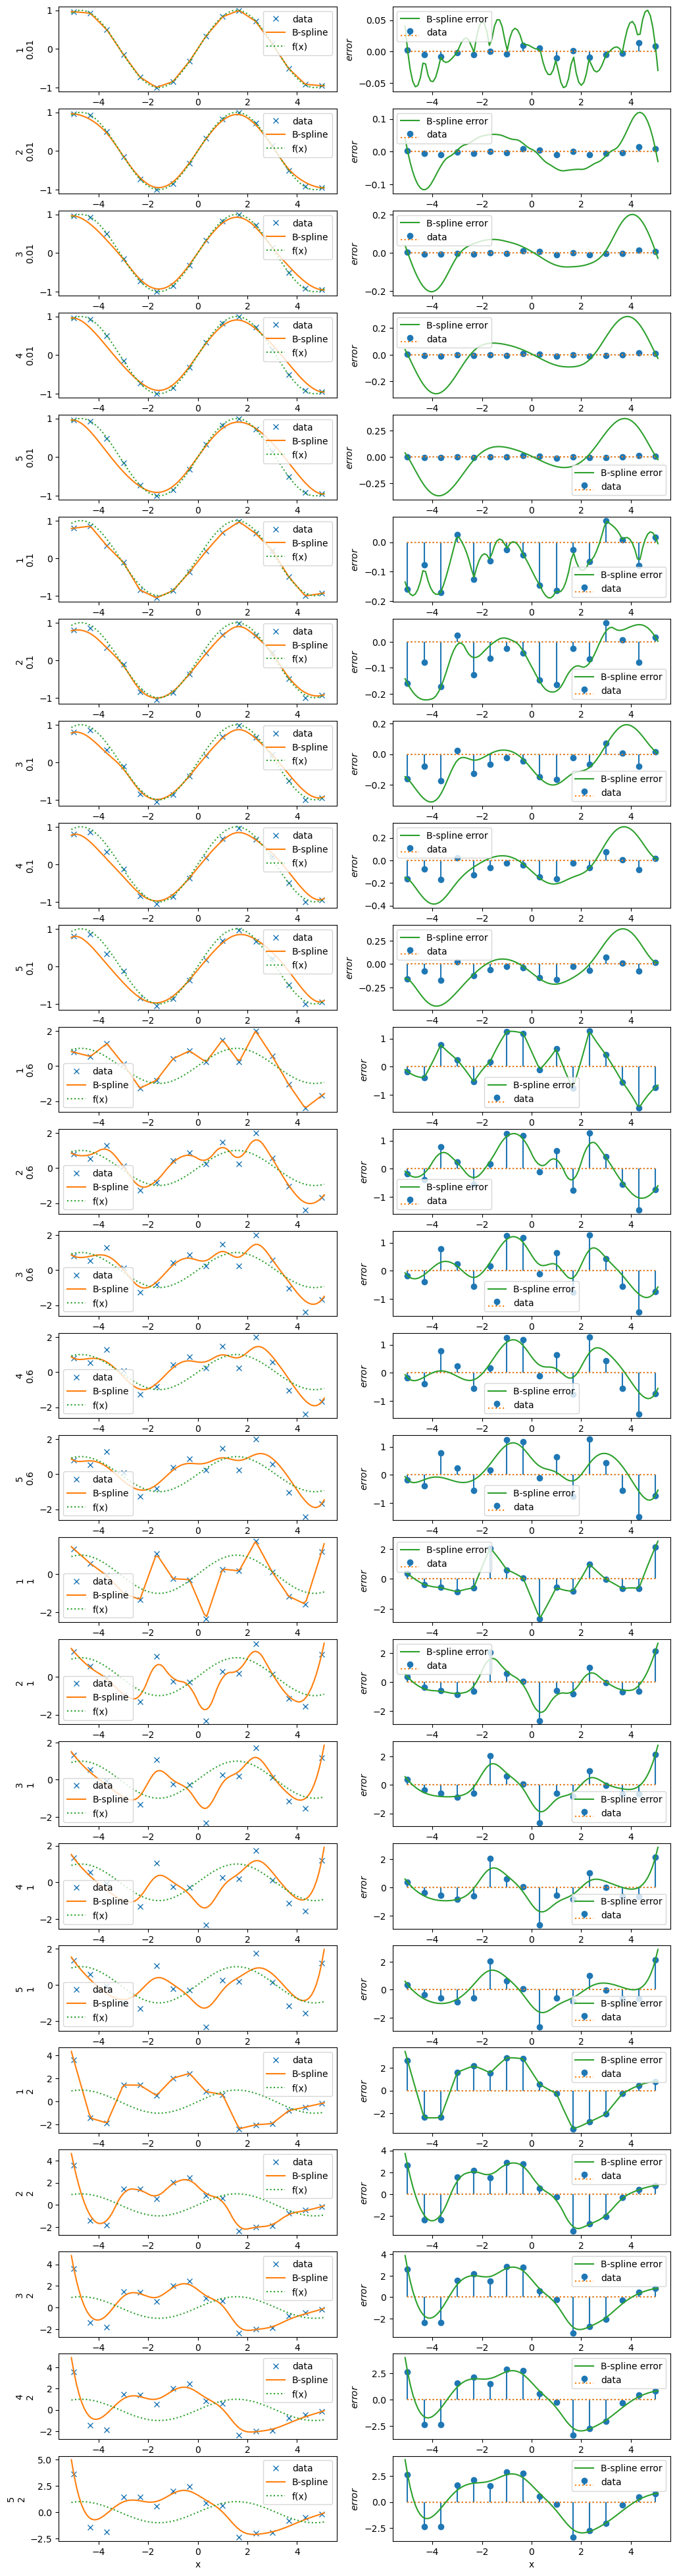

In [100]:
# Setup the fit
fig, ax = plt.subplots(len(noise_levels) * len(b_spline_degrees), 2, figsize=(12, 50))

i = 0

for noise_level in noise_levels:
    
    noise_y = noise_level * rng.standard_normal(np.size(x))
    y_measured = f(x) + noise_y
    
    for k in b_spline_degrees:
        
        ##################
            
        t, c, k = splrep(x, y_measured, k=k) # retrieve the knots (t), b-spline coeffs (c)
        b_spline_f = BSpline(t, y_measured, k)
        x_pred = np.linspace(x_domain[0], x_domain[1], n_domain)
        y_pred = b_spline_f(x_pred)
        
        ##################
        
        ax[i, 0].plot(x, y_measured, 'x', label='data')
        ax[i, 0].plot(x_pred, y_pred, label='B-spline')
        ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
        ax[i, 0].set_xlabel('x')
        ax[i, 0].set_ylabel(f'{k}\n{noise_level}')
        ax[i, 0].legend()
        
        ax[i, 1].plot(x, np.zeros_like(x), ':')
        ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
        ax[i, 1].plot(
            x_pred, 
            y_pred - y_true, 
            label='B-spline error'
        )
        ax[i, 1].set_xlabel('x')
        ax[i, 1].set_ylabel('$error$')
        ax[i, 1].legend()

        i += 1

#### Resultados.

A mayor grado, parece que las curvas se suavizan más. 
Cuando hay menos ruido, los grados bajos funcionan mejor puesto que se acercan más a los puntos de control. 
Cuando hay más ruido, los grados bajos tienden a hacer overfit, haciendo que los grados altos funcionan mejor.



# ESto es antiguo, borrar: solo lo dejo para
Podemos ver que cuando elegimos b-splines de grado alto (4 o 5) tienden a hacer 'overfit', se ajustan demasiado bien a los datos de entrada y les arrastra el ruido de los datos. Esto funciona bien para niveles de ruido bajos, se ajusta muy bien a los datos
Cuando tenemos un grado bajo 
Sin embargo cuando elegimos

---

### 2. Smoothing splines (https://youtu.be/queK1reC-ac?si=6JI5OHoLjVZ4yGLi)

#### A. Explain briefly what is a smoothing spline. Especifically, what is different between a Smoothing splines and a natural cubic spline?
    Una smoothing spline está pensada para tener un equilibrio entre la suavidad de la curva y a cómo de bien se ajusta a los puntos de control ('fit').
    Al igual que las b-splines, las smoothing splines se diferencian de las splines cúbicas naturales porque la curva resultante no pasa por los puntos de control, a cambio podemos jugar con la suavidad de la curva para ajustar mejor los datos a errores y ruido.

#### B. Use smoothing splines to fit the data for different noise leves, using different values of the smoothing parameter.

#### C. Comment the results, especially regarding robustness to noise. 
#### D. What happens if the smoothing parameter is very small? And if it is very large?
#### E. Comment the differences between the results with splines and with smoothing splines.

---

3. The cdf of the standard Gaussian is defined as $\text{norm.cdf}(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x dz e^{-\frac{z^2}{2}}$. The direct computation of this funtion by numerical quadrature is costly. Therefore, one generarally resorts to approximations that can be computed efficiently. Give such three different closed-form approximations of the funcion and compare their errors in the support of the distribution. Provide an empirical analysis of their computational costs.

----

4. Explain what is Runge's phemomenon. 
    1. Give an illustrative example.
    2. Identify a strategy to avoid this phenomenon.    
5. Explain what are thin plate splines and provide an illustration.
6. Explain what are interpolating filters and provide an illustration (https://www.youtube.com/watch?v=Xj129kA3Ci0).
6. Explain how one would use interpolation to increase the number of frames per second in a movie. Provide an illustration.